# Data Science and Business Analytics (Task-2)
### Prediction using Unsupervised ML- Iris Flowers

Author : Anjum Hassan
● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. 

● Data can be found at  : https://bit.ly/3kXTdox

### Import Required Libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans   
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
import matplotlib.pyplot as plt  

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
sns.set_style("whitegrid", {'axes.grid' : False})

from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples



import warnings
warnings.filterwarnings('ignore')


### Importing Dataset 

In [78]:
df = pd.read_csv('Iris.csv',index_col='Id')

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.shape

(150, 5)

* There are total 150 records and 5 columns.

#### Desciptive Statistics

In [80]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [81]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Species,150,3,Iris-versicolor,50


## Exploratory Data Analysis

### Missing Values Check

In [82]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* No missing values to deal with.

### Outliers Treatment

<AxesSubplot:>

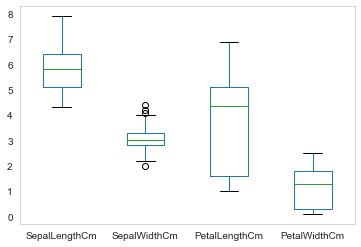

In [83]:
df.plot(kind='box')

* We can see sepal width has some outliers present, we can check with separately.

<AxesSubplot:xlabel='SepalWidthCm'>

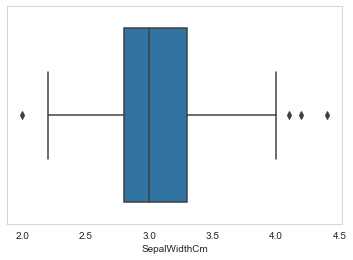

In [84]:
sns.boxplot(df['SepalWidthCm'])

* We can see the outliers are not consistent and very few in numbers, so we leave them as it is.

### Overall Relationship within Numerical Features for different Species of Iris.

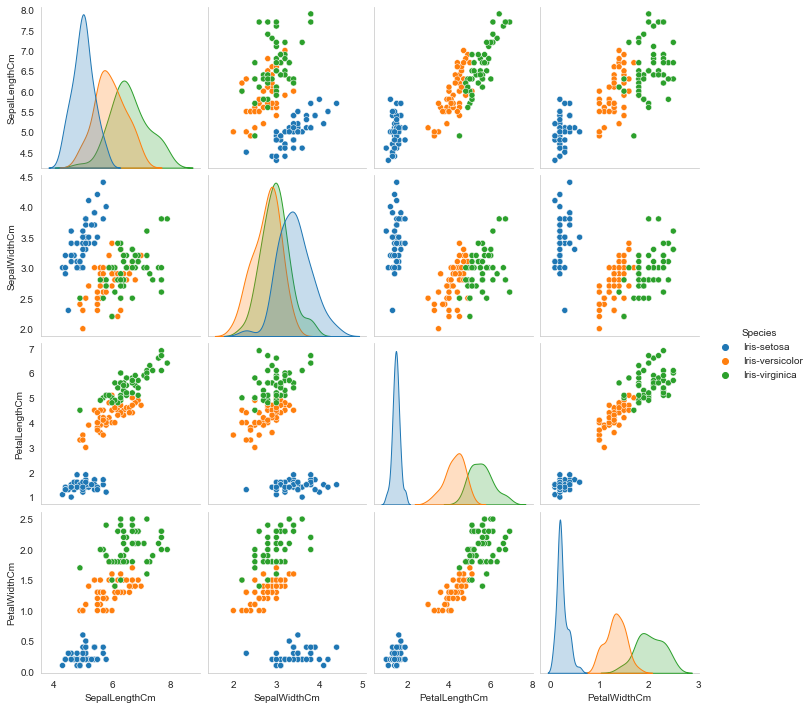

In [85]:
sns.pairplot(df,hue='Species')

### Correlation between Numerical Features.

<AxesSubplot:>

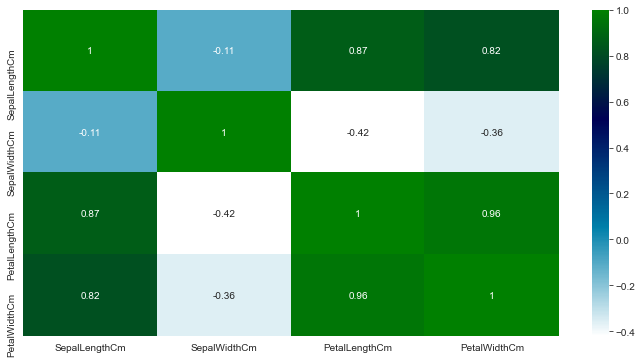

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cbar=True,cmap='ocean_r')

* As we can see from above Pairplot and correlation Heatmap,there exists strong correlation between PetalLength with PetalWidth and SepalLength. Also SepalLength is also highly correlated with  PetalWidth, and so on.

* From the pairplot we can see how the distribution is segmented when visualized with respect to different Species.

* For some combinations we can clearly identify the Species and they are separately distinguishable.

* If Species label is considered and we group our numerical data with respect to Species,there are 3 groups we can observe.

* We try eliminating the Species Feature from our dataset and utilize different Unsupervised Algorithms to identify Optimal Number of clusters based on the pattern within our data.

* Here , we will make use of K-Means and Agglomerative Clustering Techniques.

* Creating a copy of existing Dataframe and Dropping Species column.

In [87]:
df1 = df.copy()

In [88]:
df1.drop('Species',axis=1,inplace=True)

In [89]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


* Scaling Data with StandardScaler 

In [90]:
ss = StandardScaler()

In [91]:
df1_ss = ss.fit_transform(df1)

In [92]:
df1_ss = pd.DataFrame(df1_ss,columns=df1.columns)

In [93]:
df1_ss.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [94]:
round(df1_ss.describe())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0
mean,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0
max,2.0,3.0,2.0,2.0


### K-Means Clustering

* Let's assume we have 1 to 7 number of clusters in our data.
* We tried to calculate in WCSS(within cluster sum of squares) for each of them.

In [95]:
wcss = []

for k in range(1,8):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1_ss)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
cluster_errs= pd.DataFrame()
cluster_errs['Clusters'] = np.arange(1,8)
cluster_errs['WCSS'] = wcss

cluster_errs

,Clusters,WCSS
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.682216
4,5,91.066771
5,6,80.684842
6,7,70.907571


* We tried to visualize the elbow plot to get the optimal value of K(Optimal Value of Cluster in our data.`)

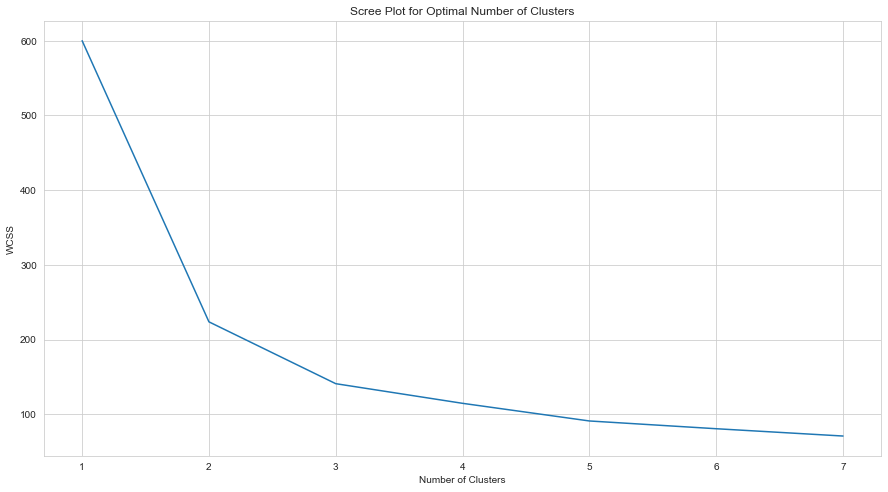

In [96]:
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,8), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")
plt.grid()

# display the plot
plt.show()


* We can see after 3 clusters, there is no significant drop in WCSS.

* We tried to crosscheck the optimal number of clusters with the help of Silhouette Co-efficient.

In [97]:
silhouette_coefficients = []

for k in range(2,8):
    
    
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(df1_ss)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(df1_ss,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
silh_coeff = pd.DataFrame()

silh_coeff['Clusters'] = np.arange(2,8)
silh_coeff['Silhouette Coefficients'] = silhouette_coefficients

silh_coeff


,Clusters,Silhouette Coefficients
0,2,0.580184
1,3,0.462149
2,4,0.386860
3,5,0.344786
4,6,0.325937
5,7,0.334606


* We tried to plot of silhouette coefficients using appropriate graphical method to check for which cluster the silhouette score is highest.

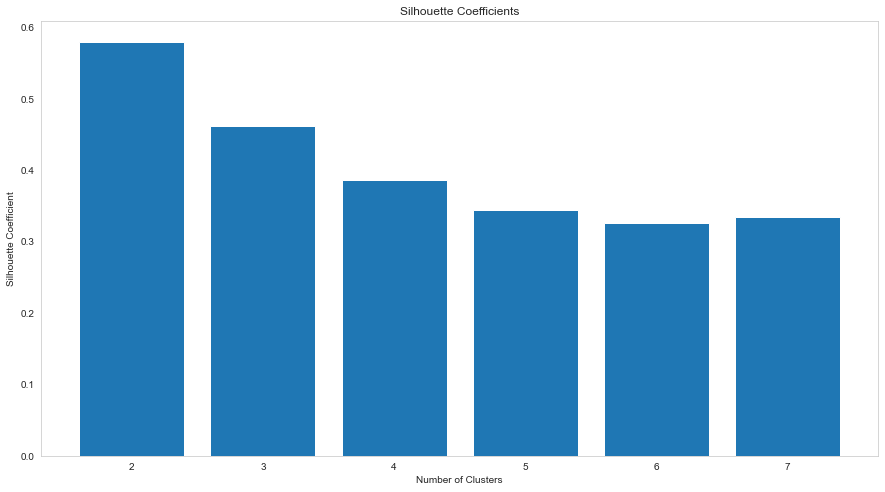

In [98]:
# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(2,8), silhouette_coefficients)

# add axes and plot labels
plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


# display the bar plot
plt.show()


* Silhouette co-efficients  suggests that, optimal number of cluster is 2.

**We can take any number of cluster between 2 or 3, We proceed with 3.**

### Fit K-means clustering algorithm with an optimal number of clusters( Cluster = 3)

In [99]:
Kmeans3=KMeans(n_clusters = 3, random_state = 1, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(df1_ss)

KMeans(max_iter=200, n_clusters=3, random_state=1, tol=0.001)

### Cluster Interpretation

In [100]:
result = Kmeans3.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs.to_frame('Cluster Size')

,Cluster Size
cluster,
0,47
1,50
2,53


### Appending Cluster Column in main data and visualize the data distribution between different clusters.

In [101]:
df1['Clusters'] = Kmeans3.labels_

In [102]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


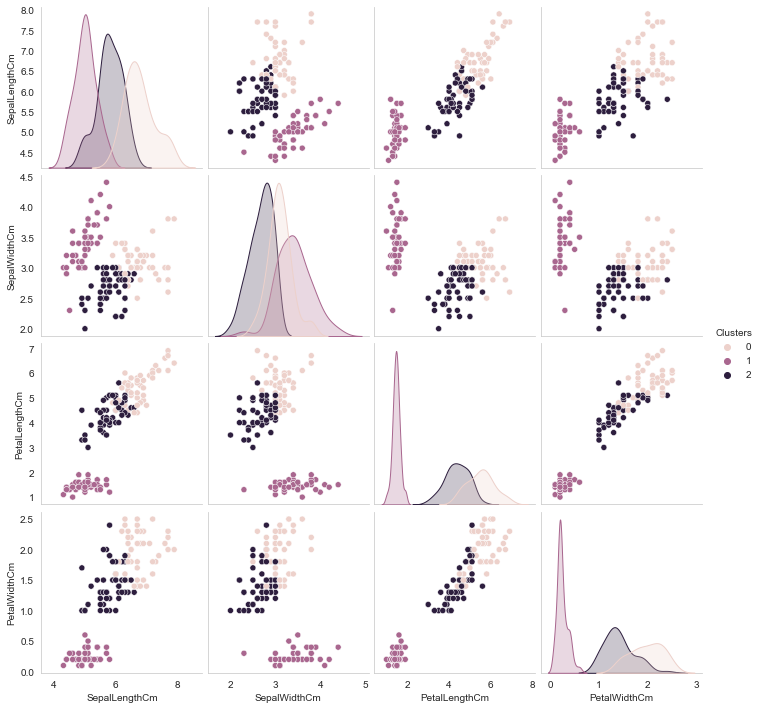

In [103]:
sns.pairplot(df1,hue='Clusters')

### Comparing Cluster based distribution and Species based distribution of Iris Data.

### Countplots

<AxesSubplot:>

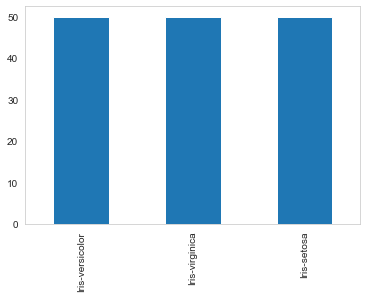

In [104]:
df.Species.value_counts().plot(kind='bar')

<AxesSubplot:>

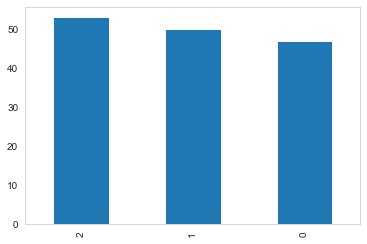

In [105]:
df1.Clusters.value_counts().plot(kind='bar')

### PairPlots

Text(0.5, 0.98, 'Segmentation Using Clusters')

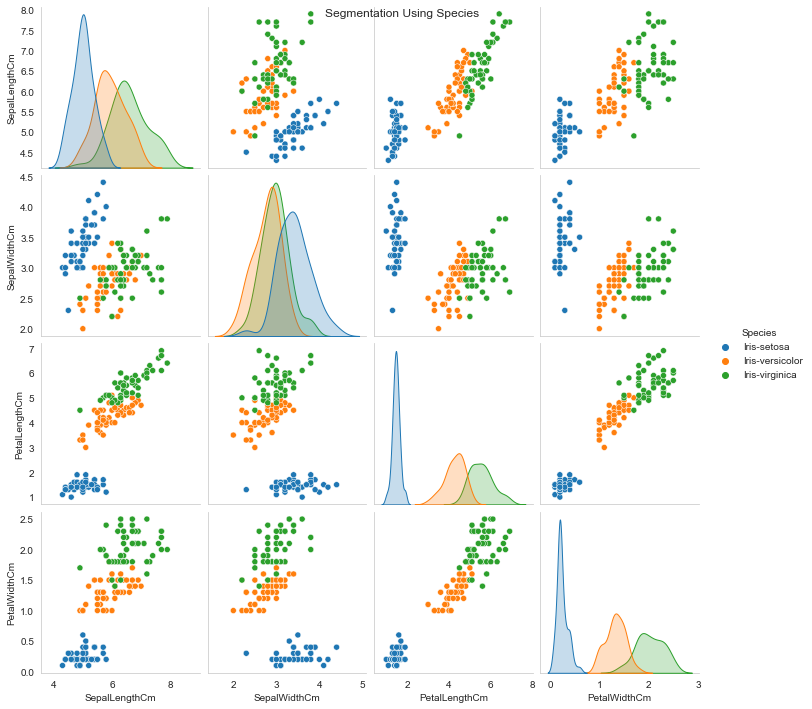

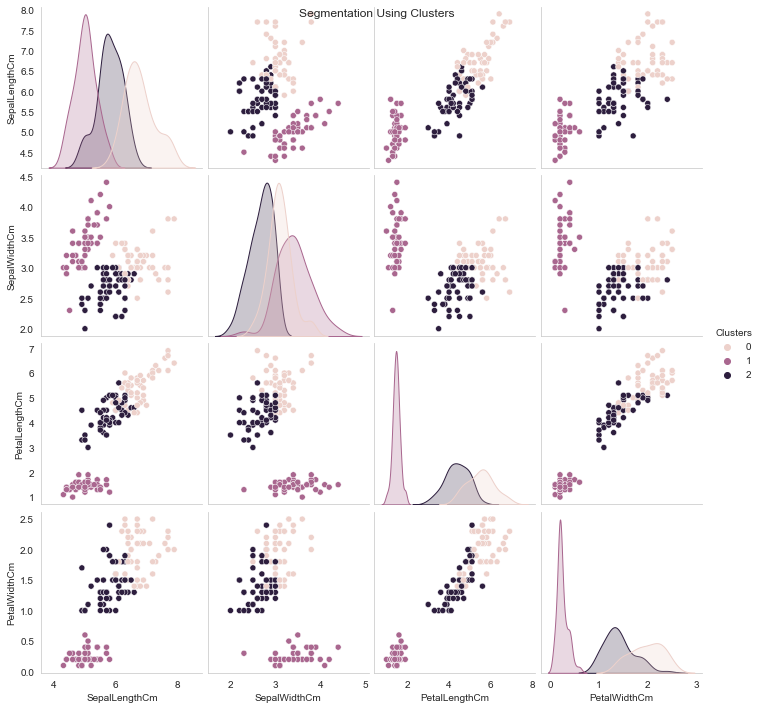

In [127]:
sns.pairplot(df,hue='Species',data=df).fig.suptitle('Segmentation Using Species')


sns.pairplot(df1,hue='Clusters',data=df1).fig.suptitle('Segmentation Using Clusters')

### Inference:
* We tried to express relation plots segmented by different species in our original data.
* Then we removed the Species column in the dataset and tried creating Clusters based on K-Means clustering.
* We found optimal number of cluster as 3 and labeled the data with those many clusters.
* We then tried to express relation plots segmented by different clusters that we made in our original data.
* The distribution is quite similar if not the same, when segmented by Species.
* From this above visualization we can infer the K-means clustering worked pretty well for this dataset.